***RESIDUAL ANALYSIS***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

***Step 1 : Load Dataset***

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Fetch the California housing dataset
california = fetch_california_housing()

# Create a DataFrame from the data and add the target (Price) column
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

# Print the first 5 rows of the DataFrame
print("Dataset (first 5 rows):\n", df.head())


Dataset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

x=df.drop('Price',axis=1)
y=df['Price']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


mae= mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"\nMAE : {mae :.2f} $100K")
print(f"\RMSE : {rmse :.2f} $100K")
print(f"R square : {r2:.2f}")



MAE : 0.53 $100K
\RMSE : 0.75 $100K
R square : 0.58


***Step 2 : Calculate Residuals***

In [17]:
residuals = y_test - y_pred

print("\nFirst 5 Residuals :")
print(pd.DataFrame({'Actual': y_test[:5],'Predicted' : y_pred[:5],'Residual':residuals[:5]}))


First 5 Residuals :
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


***Step 3 :Residual plots***


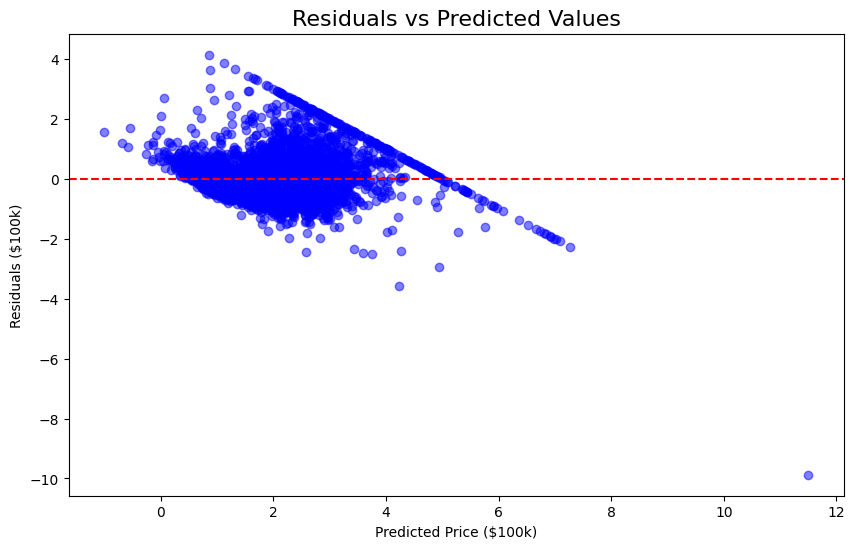

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='blue',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residuals vs Predicted Values',fontsize=16)
plt.xlabel('Predicted Price ($100k)')
plt.ylabel('Residuals ($100k)')
plt.show()

***Plot 2 : Histogram of Residuals***

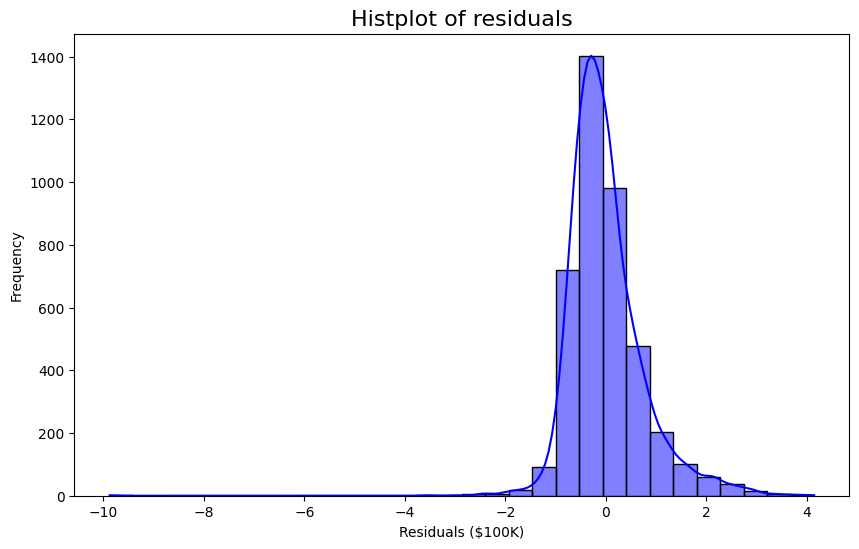

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Histplot of residuals',fontsize=16)
plt.xlabel('Residuals ($100K)')
plt.ylabel('Frequency')
plt.show()

***Plot 3 :Q-Q Plot(normality check for the residuals)***

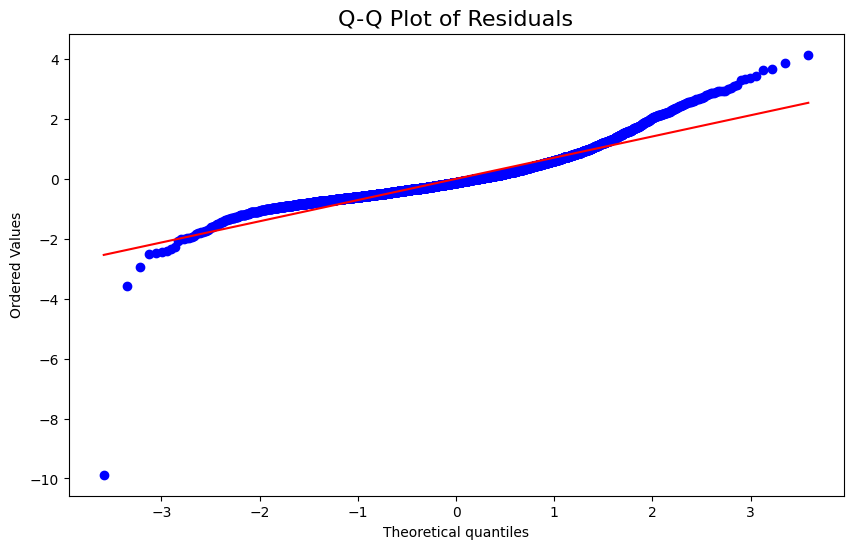

In [26]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist="norm",plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=16)
plt.show()

***Good : Points follow the red line(normal)
bad : Big deviations,especially at ends***

***Step 5 : Metrics to Support Ananlysis***

***Standardization vs Normalization***


-> standardization transform the data to have a mean of 0 and standard deviation of 1

-> not having any limits the standardization values are determined based on data

-> not sensitive to outliers

-> data is normally distributed

-> when to use :

* when data follows a Gaussian(Normal) Distribution

* used in PCA,Logistic Regression,Linear Regression,svm,kmeans

***Normalization (Min-Max Scaling)***

            
-> Normalization transforms data into a fixed range,typically [0,1] or [-1,1]

-> sensitive to outliers

-> data has different scales or outliers

-> when data has different scales and needs to be compared fairly 

-> used in Neural Networks,KNN,Decision Trees

-> Works well with bounded datasets

-> Rescales values between 0 and 1


***Cross Validation***
cross-validation is a technique used to evaluate the performance of a machine learning model by 
splitting the dataset into multiple subsets for training and testing this helps in avoiding overfitting and 
ensures that the model generalizes well to unseen data

why use:

-> prevents overfitting (when  amodel performs well on training data but       poorly on new data

-> ensures the model is evaluated on different subsets of teh data



***K-Fold Cross Validation***

Split the dataset into K equal sized folds
Train the model on K-1 folds and test on the remaining fold as the test set
Compute the average performance across all K iterations

In [60]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.datasets import make_regression



x,y = make_regression(n_samples=100,n_features=2,noise=10,random_state=42)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
model = LinearRegression()
scores = cross_val_score(model,x,y,cv=kf,scoring='r2')
print("Cross-Validation scores:",scores)
print("Average score:",scores.mean())

Cross-Validation scores: [0.98362793 0.99296851 0.99167856 0.98636391 0.99056391]
Average score: 0.9890405644488951


In [62]:
# Fetch the California housing dataset
california = fetch_california_housing()

# Create a DataFrame from the data and add the target (Price) column
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
x=df.drop('Price',axis=1)
y=df['Price']
x,y = make_regression(n_samples=100,n_features=2,noise=10,random_state=42)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
model = LinearRegression()
scores = cross_val_score(model,x,y,cv=kf,scoring='r2')
print("Cross-Validation scores:",scores)
print("Average score:",scores.mean())


Cross-Validation scores: [0.98362793 0.99296851 0.99167856 0.98636391 0.99056391]
Average score: 0.9890405644488951


**Ridge Regression**

Ridge regression is a twist on regular Regression that helps predict numbers (like test scores or sales) 
by drawing a straight line through your data. But here the big difference: it adds a "penality" 
to stop the line from getting too crazy or overreacting to weird data points its like telling your model ,
"chill out a bit-dont go overboard fitting every single dot perfectly!"

In short : Ridge Regression is Linear Regression with a rule to keep the predictions steady and overfitting

***Ridge Regression Loss Function***

Ridge regression modifies the OLS loss function by adding an L2 penality

In [70]:
import pandas as pd
df=pd.read_csv("black-friday.csv")
df.head()


User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [72]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [82]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [84]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mean())

In [88]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [94]:
# Drop duplicate rows
df.drop_duplicates()


User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                 9.842329           12.668243      8370  
1                 6.000000           14.000000     15200  
2                 9.842329           12.668243      1422  
3                14.000000           12.668243      1057  
4                 9.842329           12.668243      7969  
...                    ...                 ...       ...  
550063            9.842329           12.668243       368  
550064            9.842329           12.668243       371  
550065            9.842329           12.668243       137  
550066            9.842329           12.668243       365  
550067            9.842329           12.668243       490  

[550068 rows x 12 columns]

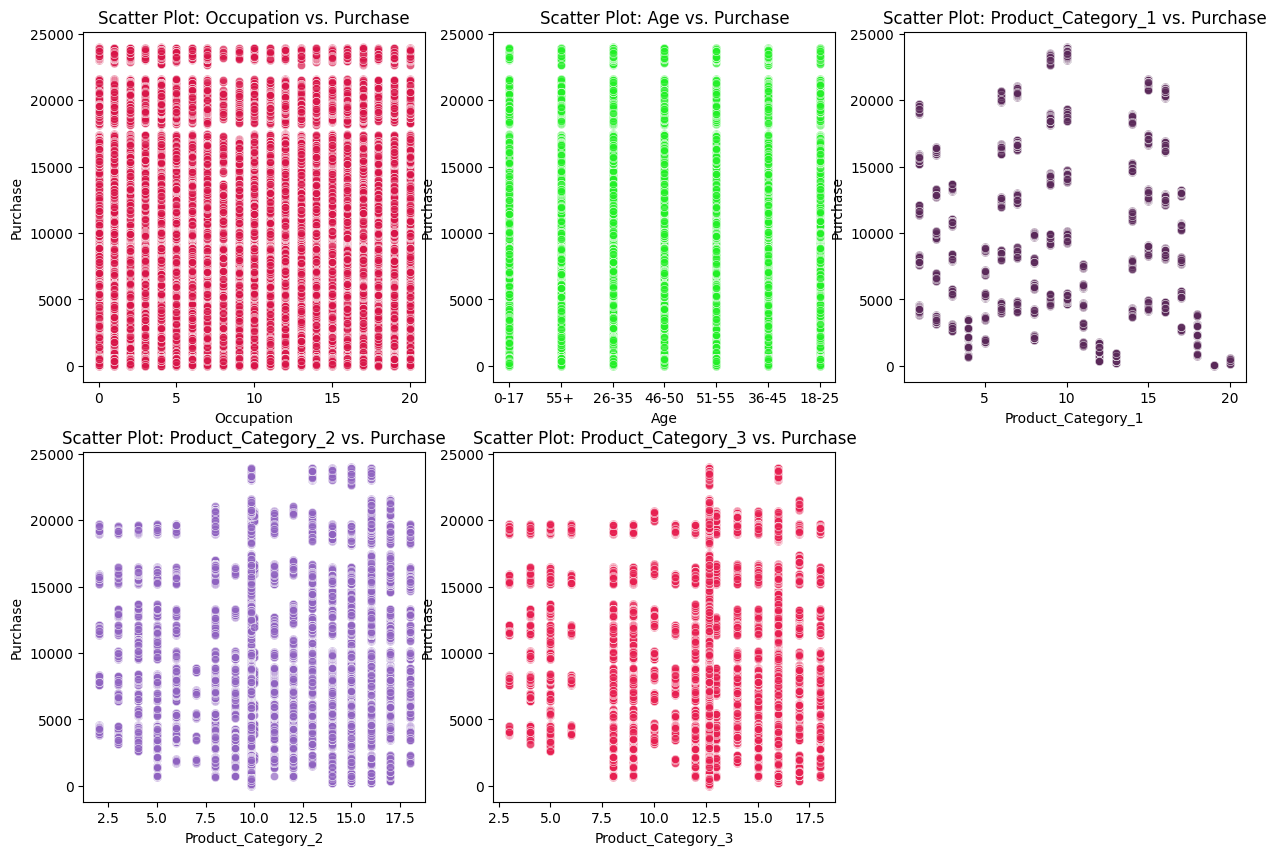

In [101]:
#Visualiztion
features = ["Occupation", "Age", "Product_Category_1", "Product_Category_2", "Product_Category_3"]
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df["Purchase"], alpha=0.7, color=np.random.rand(3,))
    plt.title(f"Scatter Plot: {feature} vs. Purchase")
    plt.xlabel(feature)
    plt.ylabel("Purchase")


plt.show()

In [107]:


# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the IQR for each column
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = numerical_df[~((numerical_df < lower_bound) | (numerical_df > upper_bound)).any(axis=1)]

print("Data after removing outliers:")
print(df_no_outliers)

Data after removing outliers:
        User_ID  Occupation  Marital_Status  Product_Category_1  \
0       1000001          10               0                   3   
2       1000001          10               0                  12   
3       1000001          10               0                  12   
4       1000002          16               0                   8   
5       1000003          15               0                   1   
...         ...         ...             ...                 ...   
545909  1006040           6               0                   5   
545910  1006040           6               0                   8   
545911  1006040           6               0                   5   
545912  1006040           6               0                   8   
545913  1006040           6               0                   5   

        Product_Category_2  Product_Category_3  Purchase  
0                 9.842329           12.668243      8370  
2                 9.842329           12.668243 

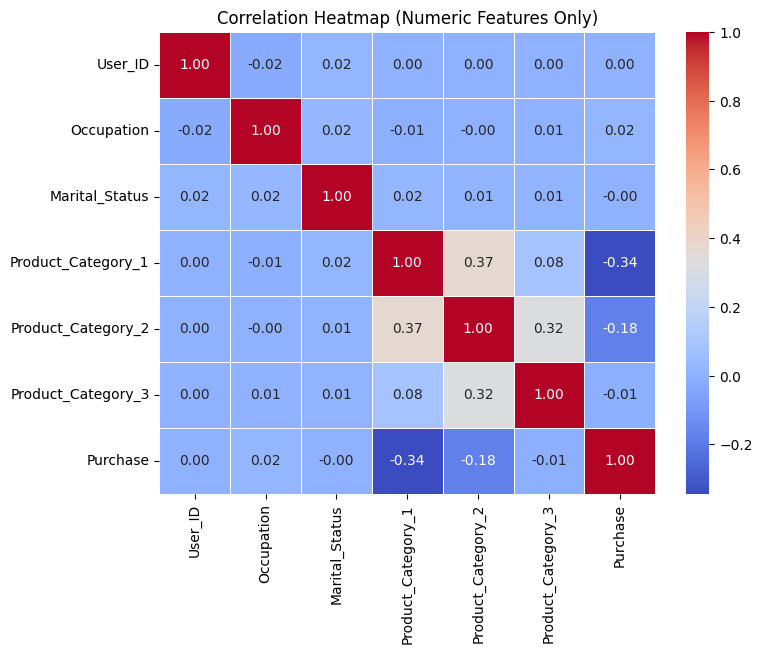

In [109]:
#Correlation between numerical columns
numeric_df = df.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Sample dataset (replace with your own DataFrame)
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# Separate the features and target variable
X = df.drop('Purchase', axis=1)  # All columns except 'Purchase'
Y = df['Purchase']  # Target variable 'Purchase'

# Categorical columns that need to be encoded
categorical_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

# Create a column transformer that applies OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', 'passthrough', X.columns.difference(categorical_cols))
    ])

# Create a pipeline that applies preprocessing and then fits a Ridge regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=100))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the Ridge regression model
pipeline.fit(X_train, y_train)

# Predicting on test set
y_pred = pipeline.predict(X_test)

# Model evaluation: Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Coefficients for each feature (after OneHotEncoding)
# To access coefficients, we need to extract them after preprocessing
model = pipeline.named_steps['regressor']
encoded_columns = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)

# Getting the feature names after OneHotEncoding
all_feature_names = np.concatenate([encoded_columns, X.columns.difference(categorical_cols)])

# Displaying the coefficients
coefficients = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': model.coef_})
print(coefficients)

# Visualizing the coefficient shrinkage
plt.figure(figsize=(8, 6))
plt.bar(all_feature_names, model.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()



ValueError: could not convert string to float: 'P00233842'